## Model Training
The topics we'll delve into in this chapter are: 

**Linear Regression** and its non-linear form, called polynomial regression
- techniques for avoiding overfitting: learning curves and regularization techniques (Ridge and Lessa regression)
**Classification** Logistic regression and Soft-Max regression

**Training Methods** Training just means minimizing the prediction error of the model using the training data. There are two wide classes of model training methods:
- closed form: a closed analytical formula exists for the parameters. For simple models this can be achieved pretty easily
- iterative optimization: the cost (error) function is too complicated and the model too complex for finding an analytical formula for the model parameters. A large variety of iterative optimization methods exist, to help out in these cases 

The training methods will be exposed along with linear regression. 

#### Linear Regression
A linear regression model is defined as: 
$$\hat{y} = \theta_0 + \theta_1x_1+...+ \theta_nx_n$$
This model has $n+1$ parameters and uses n features within the data. 
The same model can also be written in matricial form:
$$\hat{y} = h_{\vec{\theta}}(\vec{x}) = \vec{\theta}^{t} \vec{x}$$

#### Closed form training methods (Normal equation, SVD and pseudoinverse)

The MSE for this model can then be written as:
$$MSE(\vec{X}, h_{\vec{\theta}}) = \frac{1}{m} \sum_{i = 1}^{m}(\vec{\theta}^{t} \vec{x}_i - b_i)^2$$
Taking the derivate wrt to the parameter vector of the MSE and using  little bit of linear algebra, one can find a closed formula for the optimal parameters: 
$$\vec{\theta}^* = (X^tX)^{-1} X^t \vec{y}$$
where: $\vec{\theta},\vec{y}  \in R^{n}$ and $X \in R^{n\times n}$, n is the number of records in the training set. This closed form formula is called **Normal equation**.

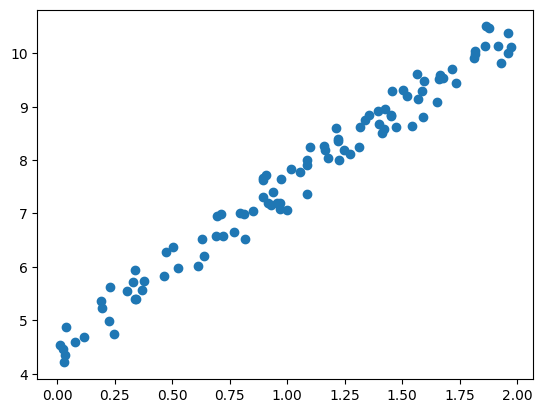

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo simulation
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100, 1)
# random noise was added to the y using np.random.rand(100, 1). So the error is distributed as an uniform
# here the true theta is (4,3). We would lika a method that estimates these values perfectly
plt.scatter(X,y,)

In [114]:
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) # the estimation for the optimal parameters is made impossible by the noise we added to y

[[4.54651281]
 [2.98163961]]


In [115]:
# trying to make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # stacking by columns
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.54651281],
       [10.50979204]])

Note that the code snippet 
```
np.c_[np.ones((2,1)), X_new]
```
adds a column of ones to the right of the X value matrix. This is done to make possible the matricial form, by adding a factors column for the interceipt ($\theta_0$)

We could also plot this model predictions, wrt to X. We also add the y plot, from whom we remove the random noise we added before. 

TypeError: 'str' object is not callable

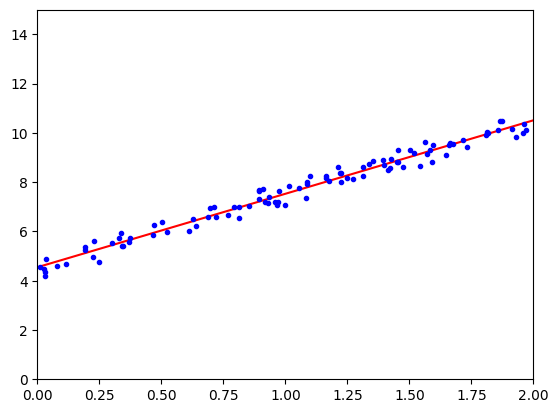

In [116]:
import matplotlib.pyplot as plt
 
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In SciKitLearn Linear Regression is implemented in the linear_model module as LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

# the paramters are found by computing the SVD inverse of the input matrix X. 
# specifically the used method is: numpy.linalg.svd(), numpy.linalg.pinv()

(array([4.47308235]), array([[3.00285506]]))

In [ ]:
lin_reg.predict(X_new) 

array([[ 4.47308235],
       [10.47879247]])

Why do we need to use the SVD and the pseudoinverse? This approach becomes very useful when it comes to dealing with edge cases. For example, when $X^tX$ is not invertible, the normal equation won't work, but the SVD and pseudoinverse will. 

A big issue of closed form methods is that they require a lot of computations when the number of dimensions to deal with becomes big. For this reason, in real life applications, iterative methods are used. They require, in general, less computational effort, at the cost of accepting an error in the result (optimal parameters)

#### Iterative Methods (Gradient descent: deterministic and stochastic)
The gradient descent is a class of iterative optimization methods that uses the full gradient of the cost function or an estimator for it. The optimal solution is then found at an arbitrary error threshold ($\epsilon$)

##### Gradient descent
At each step a new parameter value is computed as: 
$$x_{i+1}= x_i - \alpha \nabla \text{MSE}(x_i)$$

Technically the new value for the parameter is found along a line in the parameter space. For this reason this method is in the class of **line-search** methods. The chosen direction in the case of classical gradient descent is called fastest descent direction and it is defined as:
$$\vec{g} := -\nabla f(x)$$
where $f(x)$ is the cost function. Another important definition is the one of descent direction, which is a direction in the parameter space holding the following property:
$$\vec{g} \cdot \nabla f(x) < 0$$

To resume using the gergon we defined previously, gradient descent is an iterative optimization algorithm which belogns to the line-search methods. It uses the fastest descent direction. 

An important hyperparameter for gradient descent is the learning ratio (the $\alpha$ in the updating formula). If it is too high then the solution bounces all over the pace never setting to the optimal solution. If it is too low then the method becomes too slow. 
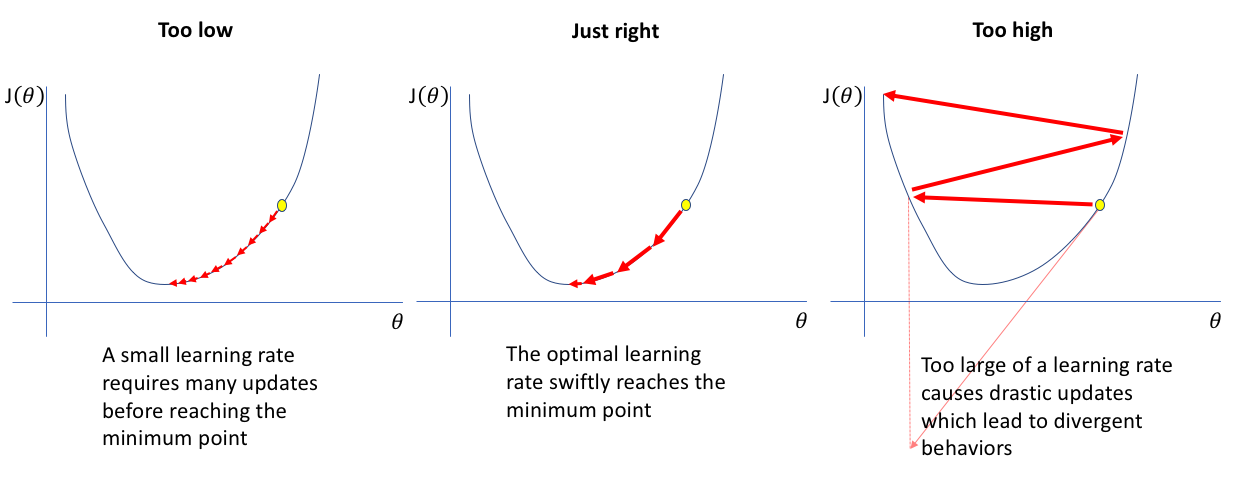

An important transformation on the data to make gradient descent work properly is feature scaling.
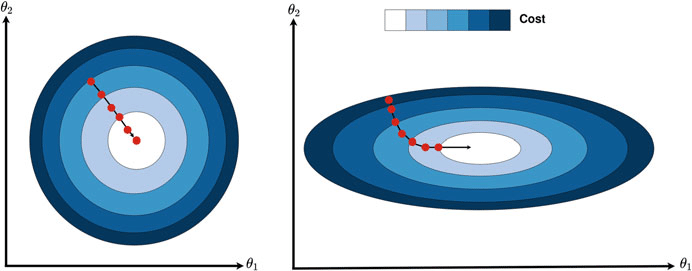

To implement the gradient descent the gradient of the cost function is computed as (element-wise): 
$$\frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^m (\theta ^t x_i - y_i)x_j$$
Where m is the numerosity of the training dataset

In [ ]:
alpha = 0.1 # learning rate 
n_iterations = 1000
m = 100 


theta = np.random.randn(2,1) # random init of the params from a Normal(0,1) creating a [2,1] vector 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

##### Stochastic Gradient Descent
The general algorithm works in the same way, but the difference is that an estimator for the gradient is used. The pure SG uses the gradient of just one loss function in the dataset. The mini-batch SG uses a mean over a set of casually chosen set of loss functions within the dataset.

It uses less computational power than the deterministic gradient and, being stochastic, the probability of finding a global minimun, escaping from a local minimum, is raised. 

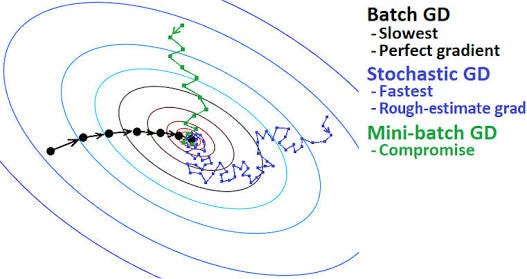

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # select index for computing the estimator
        xi = X_b[random_index:random_index+1] # select the data (first index is not taken in philtering)
        yi = y[random_index:random_index+1] # same thing here
        gradients = 2*xi.T.dot(xi.dot(theta) - yi) # computing the gradient
        eta = learning_schedule(epoch*m + i) # compute the step
        theta = theta - eta*gradients # updating the step

print(theta)

[[4.46838589]
 [3.01655625]]


##### Mini-batch gradient descent
The mini-batch gradeint descent is another stochastic method. The difference with the pure SG is the method used to compute the gradient estimator. The idea is that the estimator is computed as an average over $m_b$ loss function gradients in the dataset, instead of using just one of them as in pure SG. As a result we obtain an estimator with a reduced variance. 

The optimal value (method result) is obtained with an additional stochastic error (**gap**) that depends upon the variance of the estimator. So findig ways for diminishing the estimator variance is an optimal way for incrementing the performance of SGD. 

It can be proven that SGD diminishes the variance of the estimator by a factor of $\frac{1}{m_b}$. The formula for the estimator at each step is:
$$g(x_k) = \frac{1}{m_b} \sum_{i+1}^{m_b} \nabla l(a_i, b_i)$$

#### Polynomial Regression
The linear regression works great if there is an **actual** linear relationship within the data. But in cases where a different non-linear relationship is present, linear regression won't work. Another idea using the same model is taking as variables different powers of the same feature. In this case we can use:
$$\hat{y} = \theta_0 + \theta_1x_1+...+ \theta_nx_n$$
and the features will have the form:
$$x_i = x^i$$

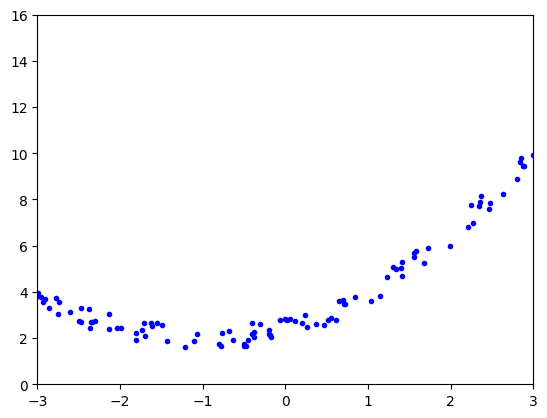

In [130]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.rand(m,1)

plt.plot(X,y, "b.")
plt.axis([-3, 3, 0, 16])
plt.show()

First of all let's modify the training set in order to add another column to the data vector X with the square of the X values. This can be easily done with the *PolyNomialFeatures* transformer. This works by increasing the size of the data set including *n* powers of the data, this permits to fit a polynomial regression on every feature. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.2486206])

In [ ]:
X_poly[0]

array([-1.2486206 ,  1.55905341])

In [ ]:
lin_reg = LinearRegression() # in the end pol reg is just a lin regression with powers of the same feature
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.54577669] [[1.02304504 0.4901578 ]]


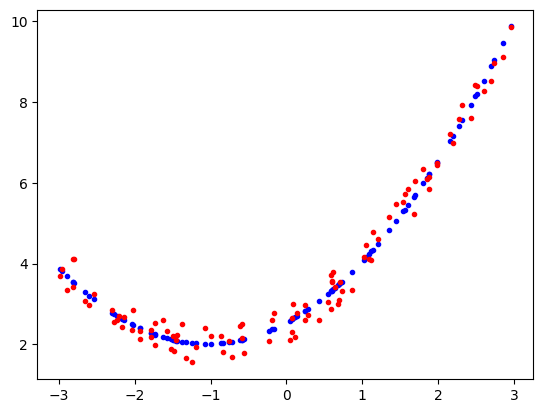

In [ ]:
pred = lin_reg.predict(X_poly)

plt.plot(X, pred, "b.") # predicted val
plt.plot(X, y, "r.") # real val
plt.show()

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
mean(cross_val_score(lin_reg, X_poly, y, cv = 10)) # Cross validation MSE 

np.float64(0.9671001172539595)

The model is not overfitting, looking at the cross validation MSE. 

##### Learning Curves
The learning curves are another method for adressing if the model is overfitting or not. It is a plot of the model performance (e.g. RMSE) as a function of the size of the training set. The idea is comparing the performance of the model on training data and cross-validation batches. If the two performances are much different, then the model is overfitting. Infact what happens is that the model is performing very well on training data and badly on cv (it is not generalizing). If the two pp. are similar, then whether the model is underfitting (bad overall performance) or has a good fit on the data. 

In [149]:
# DGP
m = 100
np.random.seed(66)
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.rand(m,1)

In [150]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)): # making the training set larger at each iteration
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth= 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth= 3, label = "val")
    plt.legend()

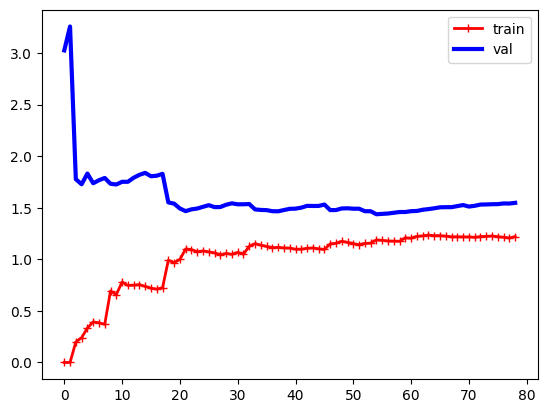

In [151]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

Looking at the resukt we have that the cv and training performances are quite similar. But the overall performance is pretty bad. In this case we can say that the model is underfitting. It is not a generalization problem since the two performances are quite similar, but even at his best, with the full training set, the model still underperforms.

In this case, adding more training data won't help out. The only way of having better performances is training a more complex model or adding new features.

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(3.0))

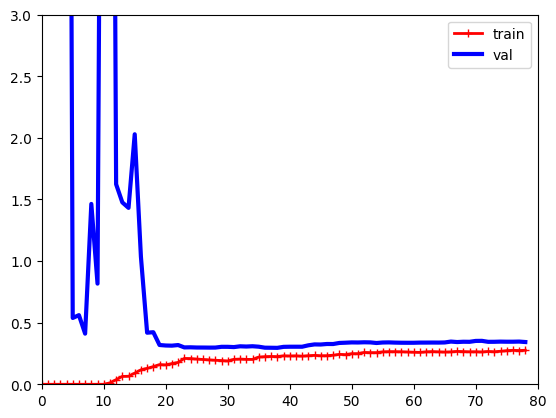

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])

Analyzing the curve we see that the overall performance is not in tune. Specifically we have that the training performance is better than the cv one. This is a classical case of overfitting, the model lacks generaliation. A good way of dealing with this would be obtaining a larger dataset.

A very important statistical result for ML is the decomposition of a model error can be written as:
$$\text{MSE}(\hat \theta) = \text{Bias}(\hat \theta)^2 + \text{Var}(\hat \theta) + \text{Var}(\epsilon)$$
where \hat $\theta$ is an estimator of the population parameter and $\epsilon$ is the stochastic error intrinsic in the data. The bias of an estimator is defined as: 
$$\text{Bias}(\hat \theta) = \mathbb{E}[\hat \theta] - \theta$$
It is a measure of how much the model miss on average in finding the right value it ha to estimate (that would be $\theta$)

##### Regularized Linear Models
Overall the learning curve is an euristic method for assessing model overfitting. An analytical approach for avoiding overfitting would be setting constraints to the optimization poblem. This will enable to achieve a regularized linear model. For a polynomial regression this means haing a model with a reduced number of polynomial degrees.

In general: Ridge is suitable when you want to prevent multicollinearity and maintain all features in the model, while Lasso is suitable when you want to perform feature selection and retain only the most relevant variables.

- **Ridge regression**
To the cost function a term:
$$\alpha \sum_{i=1}^n \theta_i^2$$
This way the parameters are forced to achieve lower values. Since the optimal parameters now depend upon their value, scaling beforehand the data becomes important. 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
ridge_reg = Ridge(alpha=1, solver = "cholesky") # a method of optimization using matrix factorization
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([7.98961944])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2") # sgd adding a quadratic term to the cost function (2-norm of the parameter to estimate)
# aka: ridge regression
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([7.35726183])

- **Lasso Regression**
In this case another costraint is imposed upon the cost function. It is the 1-norm of the parameters to estimate:
$$\alpha\sum_{i=1}^m |\theta_i|$$
Lasso regression is more likely to set unimportant parameters to zero, associated with unassociated features to the reponse variable. This feature can be explained looking at the intrinsic geometry of the problems posed by both lasso and ridge regression:

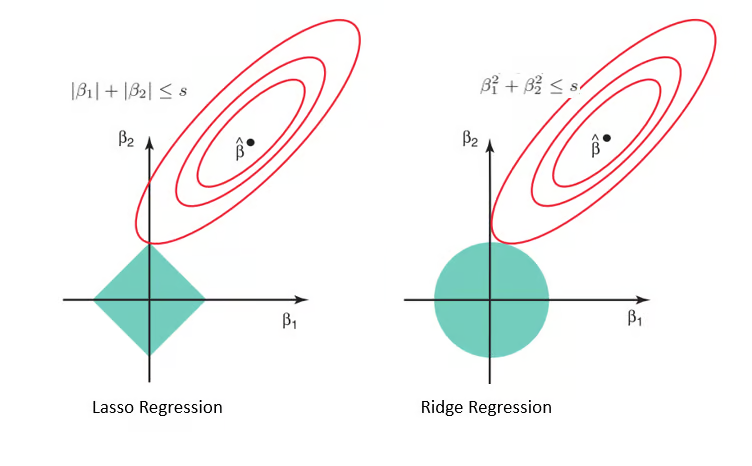



On the left we can see the geometry of the lasso regression. Imposing the 1-norm constraint to the problem, limits solution in the space parameters to be found within a quadratic subspace. In this case finding optimal solutions with zero parameters is much more likely, since edges of the subspace are to be found upon axis intersections. On the other hand the Ridge regression constraint (about the 2-norm of the parameters) just constraint the result to be found among smaller values. In this case, since we have a spherical subspace of the parameter space the probability of having zero parameters is nearly zero. 

In [165]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([7.34100947])

#### Logistic Regression
Logistic regression is a binary classifier. Its score function is a regression over the input variables and outputs the probability of the response variable to belong to a specific class. When the predicted probability is more than 0.50, then the model predicts that the respose variable belongs to the target class. 

The score function is a sigmoid:
$$\hat p = h_{\theta} (x) = \sigma (\theta ^t x)$$
and:
$$\sigma (t) = \frac{1}{1+\text{exp}(-t)}$$

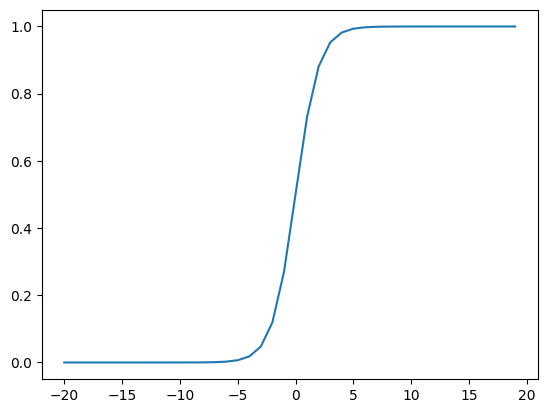

In [174]:
t = np.arange(-20,20)
def sigmoid(x):
    return 1/(1+np.exp(-x))
y = []

for i in range(len(t)):
    y.append(sigmoid(t[i]))

plt.plot(t,y)


The cost function for the logistic regression is called *log-loss*. It is defined so that it takes high values when:
- the model predicts y to be of class 1 with high probability and y is of class 0
- the model predicts y to be of class 1 with low probability and y is of class 1

In [178]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [203]:
X = iris["data"][:,3:].reshape(-1,1) # petal width
y = (iris["target"] == 2).astype(np.int_) # create a boolean vector list and then convert it to 0 and 1
# 1 if Iris virginica, 0 else

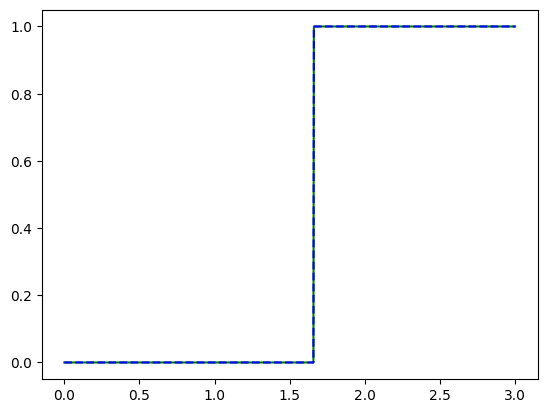

In [207]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict(X_new)
plt.plot(X_new, y_proba[:], "g-", label = "Iris Verginica")
plt.plot(X_new, y_proba[:], "b--", label = "Not Iris Verginica")

#### Softmax regression
Multiclass classification method. It computes a score for every possible class of the response variable. 
The score functions have the following form:

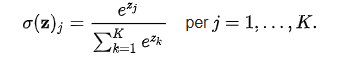

Note that every score function has its parameter vector. In this case the score function compute the score with the input z for y belonging to the class j. The one-versus-all method is used by default with this algorithm. The  classifier prediction has the form: 

$$\hat y = \text{argmax}_k s_k(x)$$

The cost function is defined through cross entropy:
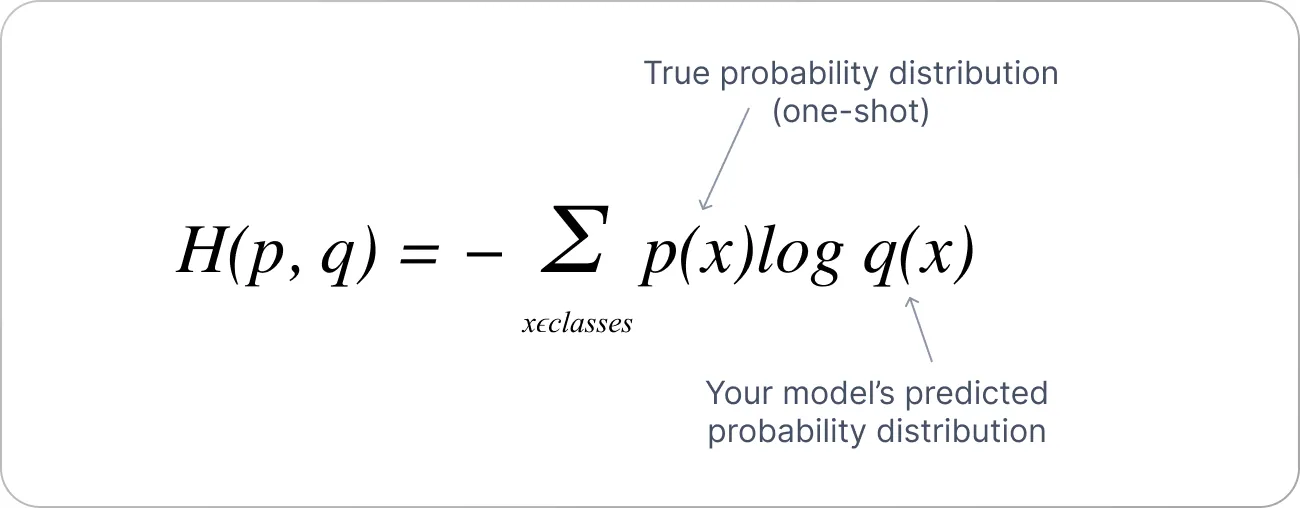

The cross-entropy is a measure of how much two probability distributions are similar. Technically we have that: 
$$H(p,q) = H(p) + D(p,q)$$
where $D(p,q)$ is the Kullback-Leibler divergence and is alway positive. The key idea is that, when p and q are different, the xentropy will be higher than the classic entropy. Taking it as part of the cost function implies that we want p and q to be as similar as possible. Which in this case is the same thing as wanting our model to perform well enough.

In [ ]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver = "lbfgs", C = 10) # look at documentation 
softmax_reg.fit(X,y)

softmax_reg.predict([[5,2]]) # predicted class
# softmax_reg.predict_proba([[5,2]]) # display scores for each possible class

c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([2])